In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/kaggle/input/nlpgettingstarted/sample_submission.csv
/kaggle/input/nlpgettingstarted/train.csv
/kaggle/input/nlpgettingstarted/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/nlpgettingstarted/train.csv")
df_test = pd.read_csv("/kaggle/input/nlpgettingstarted/test.csv")

In [3]:
df_train = df_train.drop(['keyword', 'location', 'id'], axis = 1)

In [4]:
train_df, test_df = train_test_split(df_train, test_size=500)

In [5]:
stop_words = stopwords.words("english")
snowball = SnowballStemmer(language="english")

def tokenize_sentence (sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="english")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [6]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words = True))

In [7]:
features = vectorizer.fit_transform(train_df["text"])

In [8]:
model = LogisticRegression(random_state=0)
model.fit(features, train_df["target"])

LogisticRegression(random_state=0)

In [9]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ("model", LogisticRegression(random_state=0))
])
model_pipeline.fit(train_df["text"], train_df["target"])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x783fcc46a710>)),
                ('model', LogisticRegression(random_state=0))])

In [10]:
precision_score(y_true=test_df["target"], y_pred=model_pipeline.predict(test_df["text"]))

0.8044692737430168

In [11]:
recall_score(y_true=test_df["target"], y_pred=model_pipeline.predict(test_df["text"]))

0.6990291262135923

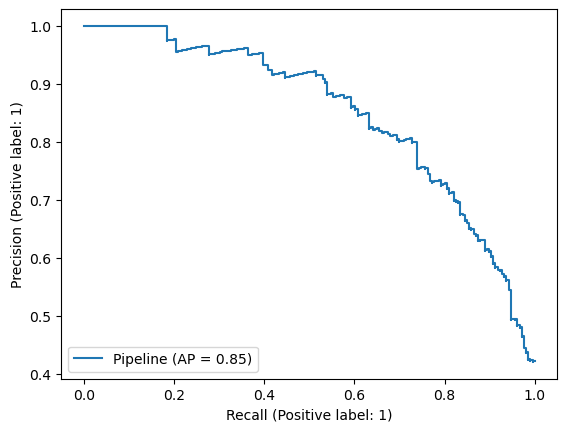

In [12]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["text"], y=test_df["target"])

In [13]:
model_grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ("model", 
     GridSearchCV(
         LogisticRegression(random_state=0),
         param_grid={'C' : [2, 2.1, 2.2]},
                    cv=5,
                    verbose=4))
])
model_grid_pipeline.fit(train_df["text"], train_df["target"])

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=2;, score=0.805 total time=   0.4s
[CV 2/5] END ...............................C=2;, score=0.790 total time=   0.3s
[CV 3/5] END ...............................C=2;, score=0.796 total time=   0.2s
[CV 4/5] END ...............................C=2;, score=0.807 total time=   0.2s
[CV 5/5] END ...............................C=2;, score=0.797 total time=   0.3s
[CV 1/5] END .............................C=2.1;, score=0.804 total time=   0.4s
[CV 2/5] END .............................C=2.1;, score=0.788 total time=   0.1s
[CV 3/5] END .............................C=2.1;, score=0.796 total time=   0.3s
[CV 4/5] END .............................C=2.1;, score=0.807 total time=   0.2s
[CV 5/5] END .............................C=2.1;, score=0.798 total time=   0.3s
[CV 1/5] END .............................C=2.2;, score=0.803 total time=   0.2s
[CV 2/5] END .............................C=2.2;,

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x783fcc25cdd0>)),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [2, 2.1, 2.2]}, verbose=4))])

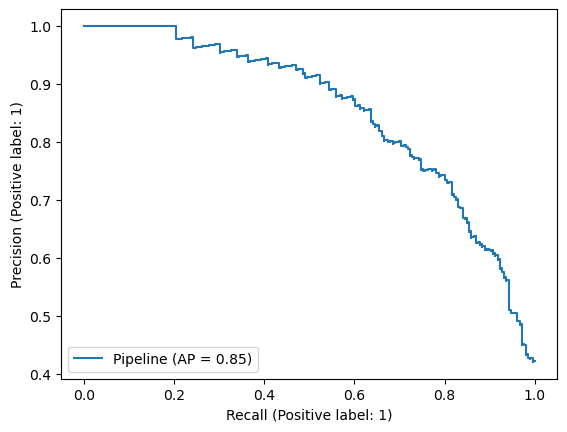

In [14]:
plot_precision_recall_curve(estimator=model_grid_pipeline, X=test_df["text"], y=test_df["target"])

In [15]:
id_col = df_test['id']
df_test = df_test.drop(['keyword', 'location', 'id'], axis = 1)

In [16]:
submission_test_pred = model_grid_pipeline.predict(df_test["text"])

In [17]:
submission_df = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred})

In [18]:
submission_df.to_csv()

',id,target\n0,0,1\n1,2,1\n2,3,1\n3,9,1\n4,11,1\n5,12,1\n6,21,0\n7,22,0\n8,27,0\n9,29,0\n10,30,0\n11,35,0\n12,42,0\n13,43,0\n14,45,0\n15,46,1\n16,47,0\n17,51,1\n18,58,0\n19,60,0\n20,69,0\n21,70,1\n22,72,0\n23,75,1\n24,84,1\n25,87,0\n26,88,0\n27,90,0\n28,94,0\n29,99,1\n30,101,0\n31,103,1\n32,106,1\n33,108,0\n34,111,1\n35,115,0\n36,116,1\n37,122,0\n38,123,0\n39,124,1\n40,125,0\n41,127,1\n42,140,1\n43,142,1\n44,147,0\n45,148,0\n46,150,0\n47,152,0\n48,154,0\n49,155,0\n50,166,0\n51,167,0\n52,169,1\n53,177,0\n54,179,0\n55,181,0\n56,186,0\n57,188,0\n58,189,0\n59,192,0\n60,200,1\n61,202,0\n62,206,1\n63,207,1\n64,214,1\n65,217,1\n66,223,0\n67,224,1\n68,227,1\n69,228,1\n70,230,1\n71,233,1\n72,234,1\n73,236,1\n74,239,1\n75,250,1\n76,255,0\n77,257,0\n78,259,0\n79,275,1\n80,278,0\n81,282,0\n82,284,0\n83,286,1\n84,288,1\n85,292,1\n86,295,0\n87,300,0\n88,304,1\n89,305,1\n90,306,0\n91,308,0\n92,311,0\n93,317,0\n94,319,0\n95,323,0\n96,324,0\n97,325,0\n98,326,0\n99,333,0\n100,339,0\n101,342,0\n102,343,0